In [117]:
#%pip install openai mysql-connector-python
#%pip install --upgrade mysql-connector-python
#%pip install sqlalchemy
#%pip install langchain langchain-community langchain-nvidia-ai-endpoints
#%pip install langchain langchain-nvidia-ai-endpoints

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/employees-dataset/figure-1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880 entries, 0 to 4879
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Activity standard occupational classification  4880 non-null   object
 1   Mode of employment                             4880 non-null   object
 2   Sex                                            4880 non-null   object
 3   Contract marker                                4880 non-null   object
 4   Nationality                                    4880 non-null   object
 5   Academic Year                                  4880 non-null   object
 6   Number                                         4880 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 267.0+ KB


In [119]:
df

,Activity standard occupational classification,Mode of employment,Sex,Contract marker,Nationality,Academic Year,Number
0,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2016/17,15
1,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2017/18,15
2,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2018/19,15
3,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2019/20,15
4,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2020/21,15
...,...,...,...,...,...,...,...
4875,Total non-academic staff,Part-time,Other,Non-academic,UK,2016/17,0
4876,Total non-academic staff,Part-time,Other,Non-academic,UK,2017/18,10
4877,Total non-academic staff,Part-time,Other,Non-academic,UK,2018/19,15
4878,Total non-academic staff,Part-time,Other,Non-academic,UK,2019/20,40


In [120]:
# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Describe numerical columns
print("\nNumerical summary:")
print(df.describe())

# Describe categorical columns
print("\nCategorical summary:")
print(df.describe(include='object'))

# Check unique values for each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

  Activity standard occupational classification Mode of employment     Sex  \
0      Managers, directors and senior officials          Full-time  Female   
1      Managers, directors and senior officials          Full-time  Female   
2      Managers, directors and senior officials          Full-time  Female   
3      Managers, directors and senior officials          Full-time  Female   
4      Managers, directors and senior officials          Full-time  Female   

                 Contract marker     Nationality Academic Year  Number  
0  Academic (excluding atypical)  European Union       2016/17      15  
1  Academic (excluding atypical)  European Union       2017/18      15  
2  Academic (excluding atypical)  European Union       2018/19      15  
3  Academic (excluding atypical)  European Union       2019/20      15  
4  Academic (excluding atypical)  European Union       2020/21      15  

Missing values per column:
Activity standard occupational classification    0
Mode of employ

In [121]:
df

,Activity standard occupational classification,Mode of employment,Sex,Contract marker,Nationality,Academic Year,Number
0,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2016/17,15
1,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2017/18,15
2,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2018/19,15
3,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2019/20,15
4,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2020/21,15
...,...,...,...,...,...,...,...
4875,Total non-academic staff,Part-time,Other,Non-academic,UK,2016/17,0
4876,Total non-academic staff,Part-time,Other,Non-academic,UK,2017/18,10
4877,Total non-academic staff,Part-time,Other,Non-academic,UK,2018/19,15
4878,Total non-academic staff,Part-time,Other,Non-academic,UK,2019/20,40


In [122]:
categorical_data = {}
for col in df.select_dtypes(include=['object']).columns:
    categorical_data[col] = df[col].unique()
categorical_data

{'Activity standard occupational classification': array(['Managers, directors and senior officials',
        'Professional occupations',
        'Associate professional and technical occupations',
        'Clerical and manual occupations', 'Total academic staff',
        'Administrative and secretarial occupations',
        'Skilled trades occupations',
        'Caring, leisure and other service occupations',
        'Sales and customer service occupations',
        'Process, plant and machine operatives', 'Elementary occupations',
        'Total non-academic staff'], dtype=object),
 'Mode of employment': array(['Full-time', 'Part-time', 'All'], dtype=object),
 'Sex': array(['Female', 'Male', 'Other', 'All'], dtype=object),
 'Contract marker': array(['Academic (excluding atypical)', 'Academic atypical',
        'Non-academic'], dtype=object),
 'Nationality': array(['European Union', 'Non-European Union', 'Not known', 'UK', 'All'],
       dtype=object),
 'Academic Year': array(['2016/17

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

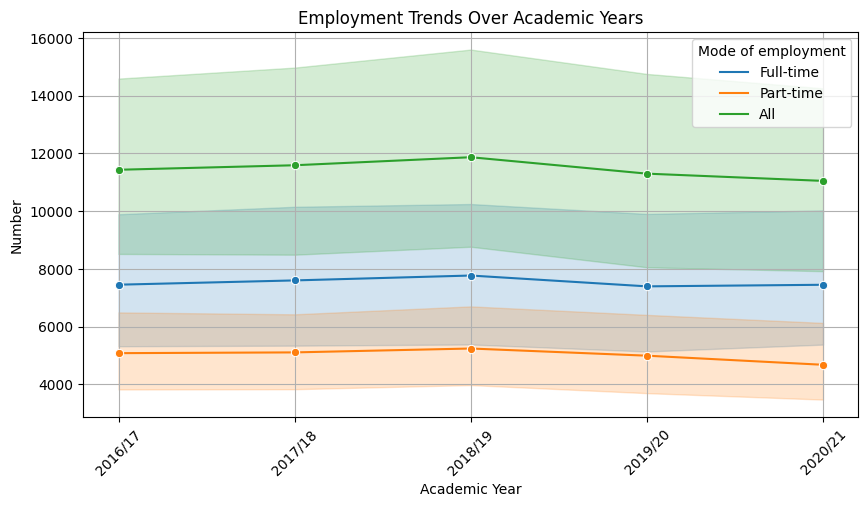

In [123]:
# Distribution of employment numbers over academic years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Academic Year", y="Number", hue="Mode of employment", marker="o")
plt.title("Employment Trends Over Academic Years")
plt.xticks(rotation=45)
plt.grid()
plt.show()

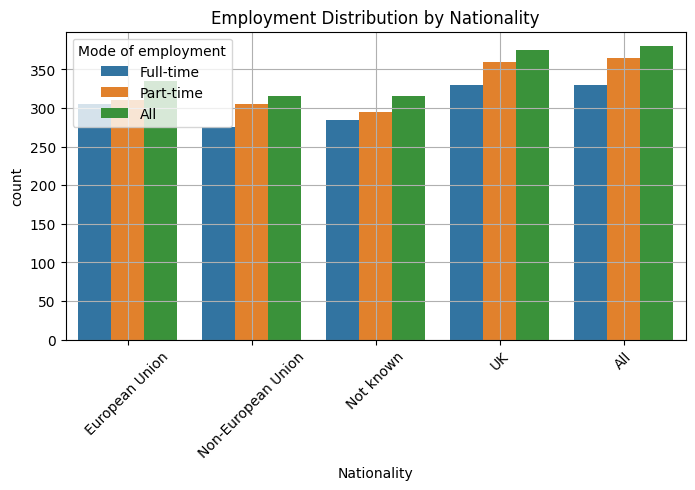

In [124]:
# Distribution of nationalities in dataset
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Nationality", hue="Mode of employment")
plt.title("Employment Distribution by Nationality")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [125]:
df

,Activity standard occupational classification,Mode of employment,Sex,Contract marker,Nationality,Academic Year,Number
0,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2016/17,15
1,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2017/18,15
2,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2018/19,15
3,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2019/20,15
4,"Managers, directors and senior officials",Full-time,Female,Academic (excluding atypical),European Union,2020/21,15
...,...,...,...,...,...,...,...
4875,Total non-academic staff,Part-time,Other,Non-academic,UK,2016/17,0
4876,Total non-academic staff,Part-time,Other,Non-academic,UK,2017/18,10
4877,Total non-academic staff,Part-time,Other,Non-academic,UK,2018/19,15
4878,Total non-academic staff,Part-time,Other,Non-academic,UK,2019/20,40


In [126]:
print(df.columns.tolist())


['Activity standard occupational classification', 'Mode of employment', 'Sex', 'Contract marker', 'Nationality', 'Academic Year', 'Number']


In [127]:
import pandas as pd
import sqlite3

# Load your CSV
df = pd.read_csv("/kaggle/input/employees-dataset/figure-1.csv")

# Replace spaces with underscores in column names
df.columns = [col.replace(' ', '_') for col in df.columns]

# Connect and replace the SQLite table with updated column names
conn = sqlite3.connect("employment_data.db")
df.to_sql("employment_data", conn, index=False, if_exists="replace")

# Confirm new columns in DB
cursor = conn.cursor()
cursor.execute("PRAGMA table_info(employment_data);")
columns = [col[1] for col in cursor.fetchall()]
print("Updated columns in SQLite table:", columns)

conn.close()


Updated columns in SQLite table: ['Activity_standard_occupational_classification', 'Mode_of_employment', 'Sex', 'Contract_marker', 'Nationality', 'Academic_Year', 'Number']


In [128]:
import sqlite3

conn = sqlite3.connect("employment_data.db")
cursor = conn.cursor()

cursor.execute("PRAGMA table_info(employment_data);")
columns = cursor.fetchall()

for col in columns:
    print(col)

conn.close()


(0, 'Activity_standard_occupational_classification', 'TEXT', 0, None, 0)
(1, 'Mode_of_employment', 'TEXT', 0, None, 0)
(2, 'Sex', 'TEXT', 0, None, 0)
(3, 'Contract_marker', 'TEXT', 0, None, 0)
(4, 'Nationality', 'TEXT', 0, None, 0)
(5, 'Academic_Year', 'TEXT', 0, None, 0)
(6, 'Number', 'INTEGER', 0, None, 0)


In [129]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("Nvapi_Key")



In [130]:
import os
from langchain_nvidia_ai_endpoints import ChatNVIDIA

In [131]:
if "NVIDIA_API_KEY" in os.environ:
    del os.environ["NVIDIA_API_KEY"]
    print("Deleted the Exisiting NVIDIA_API_KEY from Environment")

Deleted the Exisiting NVIDIA_API_KEY from Environment


In [132]:
nvapi_key= secret_value_0
os.environ["NVIDIA_API_KEY"]=nvapi_key
llm=ChatNVIDIA(model="meta/llama3-8b-instruct")

In [133]:
#Here, the we defining the way to start the prompting
SCHEMA_DESC = """
Table: employment_data

Columns:
- Activity_standard_occupational_classification (text)
- Mode_of_employment (text)
- Sex (text)
- Contract_marker (text)
- Nationality_(text)
- Academic_Year (text)
- Number (integer)
"""


In [134]:
def user_prompt(user_message, schema):
    prompt = f"""You are an expert in SQL. Given the following SQLite database schema and a user question, generate a valid SELECT SQL query only. Do not include explanations.

Schema:
{SCHEMA_DESC}

User Question: "{user_message}"

Return only the SQL query:
"""

    response = llm.invoke(prompt)  # This is where the NVIDIA chat model is called

    print("Raw LLM response:", response)  

    sql_query = response.content.strip()
    print("Parsed SQL query:", sql_query)  

    # Basic safety check
    if not (sql_query.lower().startswith("select") or sql_query.lower().startswith("with")):
        raise ValueError(f"Generated SQL query does not start with SELECT or WITH!\nGot: {sql_query}")

    return sql_query


In [135]:
# --- Node 2: Execute the SQL query on SQLite database ---

def run_sql(sql_query, conn):
    try:
        result_df = pd.read_sql_query(sql_query, conn)
        return result_df
    except Exception as e:
        return str(e)  # Return error as string if query fails


In [136]:
# --- Node 3: SQL Query Language to Natural Language 

def result_to_user(user_message, sql_query, result_df):
    result_text = result_df.to_string(index=False)

    prompt = f"""You are a helpful assistant that interprets database results.

User Question: {user_message}
SQL Query: {sql_query}
SQL Result:
{result_text}

Based on the above result, provide a clear and concise answer to the user's question in natural language.

Answer:"""

    # Use LangChain-compatible call
    response = llm.invoke(prompt)
    answer = response.content.strip()
    return answer


In [137]:
if __name__ == "__main__":
    import sqlite3

    # Connect to your SQLite database
    conn = sqlite3.connect("employment_data.db")

    # Example user question
    question = "How many full-time female are there ?"

    try:
        sql = user_prompt(question, schema)  
        print("Generated SQL:")
        print(sql)
        print()

        result = run_sql(sql, conn)
        if isinstance(result, str):  
            print("SQL Error:", result)
        else:
            print("SQL Result:")
            print(result)
            print()

            answer = result_to_user(question, sql, result)  
            print("Final Answer:")
            print(answer)

    finally:
        conn.close()


Raw LLM response: content="SELECT COUNT(*) \nFROM employment_data \nWHERE Mode_of_employment = 'Full-time' AND Sex = 'Female';" additional_kwargs={} response_metadata={'role': 'assistant', 'content': "SELECT COUNT(*) \nFROM employment_data \nWHERE Mode_of_employment = 'Full-time' AND Sex = 'Female';", 'token_usage': {'prompt_tokens': 116, 'total_tokens': 141, 'completion_tokens': 25}, 'finish_reason': 'stop', 'model_name': 'meta/llama3-8b-instruct'} id='run--1e897fb3-1f41-4be7-b497-7e77d5f367d5-0' usage_metadata={'input_tokens': 116, 'output_tokens': 25, 'total_tokens': 141} role='assistant'
Parsed SQL query: SELECT COUNT(*) 
FROM employment_data 
WHERE Mode_of_employment = 'Full-time' AND Sex = 'Female';
Generated SQL:
SELECT COUNT(*) 
FROM employment_data 
WHERE Mode_of_employment = 'Full-time' AND Sex = 'Female';

SQL Result:
   COUNT(*)
0       435

Final Answer:
There are 435 full-time female employees.
